In [70]:
# Challenge accepted
# https://twitter.com/0xabad1dea/status/1119384240070598656
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [11]:
def getTextFromHTML(filename):
    with open(filename, "r", encoding="utf-8") as infile:
        soup = BeautifulSoup(infile, "html.parser")
        return soup.get_text()

In [31]:
whitespace = re.compile("\s+")
def getWordsForText(text):
    words = whitespace.sub(" ", text).strip().split(" ")
    return words
#getWordsForText(getTextFromHTML("gitt/OPS/body4.xhtml"))

In [24]:
gitt_path = "gitt/OPS/body{}.xhtml"
rits_path = "rits/OPS/body{}.xhtml"
# ch1 - end, not including epilogue poem
gitt_paths = [gitt_path.format(i) for i in range(4, 32)]
# ch1 - end, not including the Prior Volume summary
rits_paths = [rits_path.format(i) for i in range(4, 38)]
allpaths = gitt_paths + rits_paths
#allpaths

In [50]:
chapterWords = [getWordsForText(getTextFromHTML(path)) for path in allpaths]
chapterLengths = [len(a) for a in chapterWords]

In [68]:
#chapterlengths
def formatChapter(words):
    return " ".join(words[0:10]).split("♦", 2)[0]
for i in range(len(chapterLengths)):
    print("{:<70} | {}".format(formatChapter(chapterWords[i]), chapterLengths[i]))

CHAPTER ONE Wilderness Framing a Road                                  | 4287
CHAPTER TWO An Eighth Of Blood                                         | 3435
INTERLUDE: SPARKASUKI, AS TOLD IN THE COUNTRY OF ANTARAM Before        | 722
CHAPTER THREE Sisters                                                  | 5120
CHAPTER FOUR Uncountably Many                                          | 3360
INTERLUDE: INDRANIL, AS TOLD IN THE COUNTRY OF CHALD Before            | 729
CHAPTER FIVE The Will of the World                                     | 2438
CHAPTER SIX Shackles                                                   | 5869
INTERLUDE: ARAKEL, AS TOLD IN THE COUNTRY OF TOKHAR Before             | 661
CHAPTER SEVEN Boars of the West                                        | 5376
CHAPTER EIGHT The Quiet Confidence                                     | 3444
CHAPTER NINE Once, Long Ago                                            | 2680
CHAPTER TEN Two In Number                                          

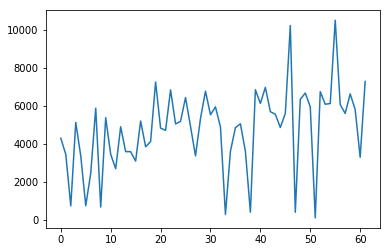

In [69]:
plt.plot(chapterlengths)

In [71]:
linregress(list(range(len(chapterLengths))), chapterLengths)

LinregressResult(slope=47.59588023469567, intercept=3330.519201228879, rvalue=0.3970921672281331, pvalue=0.0013955542236623716, stderr=14.201702451844284)